In [2]:
# from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from nltk.corpus import stopwords
import re

In [ ]:
nlp = spacy.load('en_core_web_lg')
words = stopwords.words('english')

In [ ]:
pattern = re.compile(r'\b('+r"".join(words)+r')')

In [3]:
path_train_text='dataset/hate/train_text.txt'
hate_tok =tokeniser.tokenise_txt(path_train_text)
hate_tok

NameError: name 'tokeniser' is not defined

In [ ]:
''' 
Laurids' quick introduction to regex, please don't delete this
defining a pattern:
    pattern = re.compile(r'waow') # We're gonna be looking for waow
    somewhere in the text = re.search(pattern, text) # Looks for the pattern anywhere in the text
    beginning of text = re.match(pattern, text) # Only looks if the beginning matches the pattern
    in the text = re.matchall(pattern, text) # Looks for pattern everywhere in the text -- idk much abt this

    a regex match has a start position, end position and a single index.
        text = 'waow i am alive!'
        match[0] = 'waow'
        match.start() = 0
        match.end() = 3

    difference between re.match() and the start-of-line character "^"
        multiline = """string I am 
        strong on a new line"
        
        re.match(r'^strong', multiline, re.MULTILINE) # doesn't match since it is not at the very beginning
        re.search(r'^strong', multiline, re.MULTILINE) # matches on the second line because it's at the beginning of line 2
        NOTE: re.MULTILINE requires the pattern to be given in the parameters and not as a re.compile object
'''

' \nLaurids\' quick introduction to regex, please don\'t delete this\ndefining a pattern:\n    pattern = re.compile(r\'waow\') # We\'re gonna be looking for waow\n    somewhere in the text = re.search(pattern, text) # Looks for the pattern anywhere in the text\n    beginning of text = re.match(pattern, text) # Only looks if the beginning matches the pattern\n    in the text = re.matchall(pattern, text) # Looks for pattern everywhere in the text -- idk much abt this\n\n    a regex match has an start position, end position and a single index.\n        text = \'waow i am alive!\'\n        match[0] = \'waow\'\n        match.start() = 0\n        match.end() = 3\n\n    difference between re.match() and the start-of-line character "^"\n        multiline = """string I am \n        strong on a new line"\n        \n        re.match(r\'^strong\', multiline, re.MULTILINE) # doesn\'t match since it is not at the very beginning\n        re.search(r\'^strong\', multiline, re.MULTILINE) # matches on t

In [ ]:
with open('../dataset/hate/train_text.txt', 'r', encoding='UTF-8') as infile:
    i = 0
    with open('hundredtweets.csv', 'w', encoding='UTF-8') as outfile:
        while i < 100:
            line = infile.readline()
            if len(line) > 1:
                outfile.write(' '.join(infile))
                i += 1
                print(line, i)
            else:
                continue

@user nice new signage. Are you not concerned by Beatlemania -style hysterical crowds crongregating on you… 
 1


KeyboardInterrupt: 

In [ ]:
ratings = pd.read_csv('../dataset/Task3rating.csv')
ratings.drop(ratings.tail(1).index,inplace=True)

truth = ratings['Real labels']
Chris = ratings[['Chris', 'Real labels']]
German = ratings['Germán ']
Hubert = ratings['Hubert']
Laurids = ratings['Laurids']
Paula = ratings['Paula']

In [ ]:
def plot_cf(real, guess, name):
    #creating a confusion matrix from our guesses
    cf = confusion_matrix(real, guess)

    #creating labels to add to the heatmap
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    #creating the heatmap and adding titels
    f, ax = plt.subplots(figsize=(10,7))
    sns.heatmap(cf, annot=labels, fmt='', cmap='Blues')

    plt.suptitle('Heatmap of the confusion matrix', fontsize=18, x=0.45)
    plt.title(f'Heatmap for {name}', fontsize=12)

    #if savefigs:
    #    plt.savefig("../figs/figure0102.png", bbox_inches="tight")

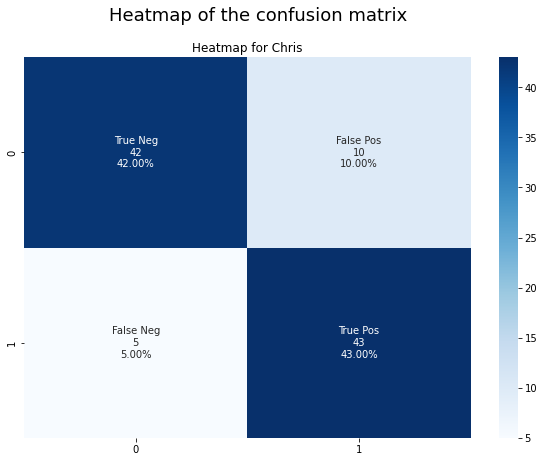

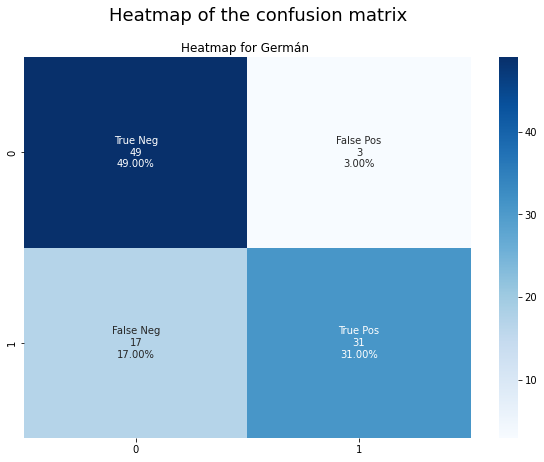

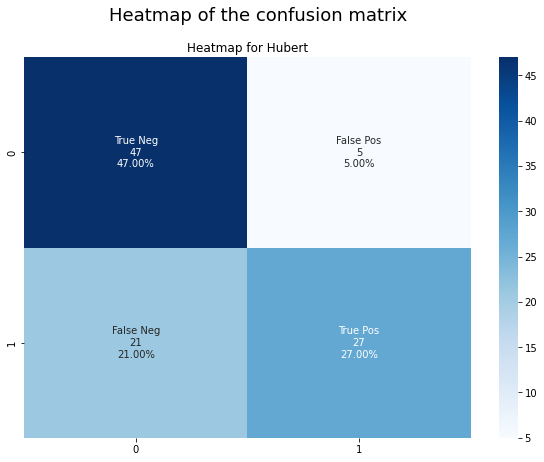

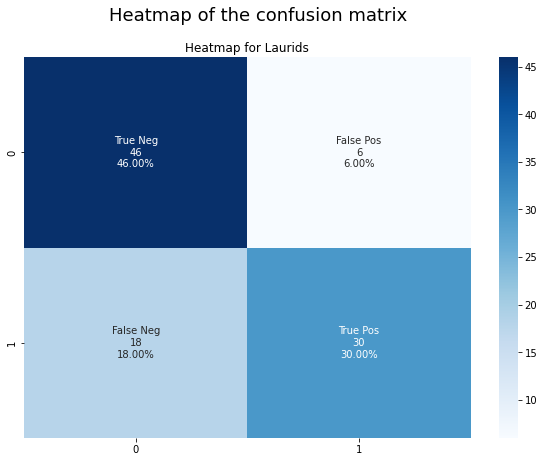

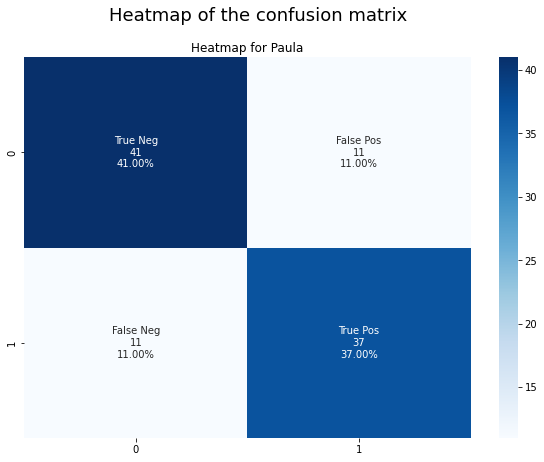

In [ ]:
x = ['Chris', 'Germán ', 'Hubert', 'Laurids', 'Paula']

for name in x:
    plot_cf(ratings['Real labels'], ratings[name], name)

In [ ]:
# False positives mean you might over-ban
# False negatives mean you might under-ban

# Safer to over-ban because it's easier to un-ban than become infested with hate speech

In [ ]:
for name in x:
    score = balanced_accuracy_score(ratings['Real labels'], ratings[name])
    print(f'{name} got a balanced accuracy score of {score:.2f}')

Chris got a balanced accuracy score of 0.85
Germán  got a balanced accuracy score of 0.79
Hubert got a balanced accuracy score of 0.73
Laurids got a balanced accuracy score of 0.75
Paula got a balanced accuracy score of 0.78


In [ ]:
#score = [balanced_accuracy_score(ratings['Real labels'], ratings[name]) for name in x]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c403ddb4-334f-46ca-beb7-bacf2f5feb5d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>